# Zomato Analysis for all the restaurants in Bangalore city


In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import sqlite3

In [3]:
# making a connection with database
con = sqlite3.connect(r'E:\data analyst projects\Zomato_analysis\zomato_rawdata.sqlite')

In [4]:
# importing file or table through sql query
pd.read_sql_query('select *  from users', con).head(2)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [5]:
# Storing file in a variable df
df = pd.read_sql_query('select *  from users', con)

In [6]:
# Checking no rows and columns
df.shape

(51717, 18)

In [7]:
# Columns Name 
df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [8]:
# finding missing values
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [9]:
# % of null values
df.isnull().sum()/len(df)*100

index                           0.000000
url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [ ]:
# 1.) rate and dish_liked column has considerable amount of null values

In [10]:
# Checking Unique values in columns having considerable amount of null values 
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [11]:
# updating string values to null values as these does not provide any sense in rate column.
df['rate'].replace(('NEW', '-'), np.nan, inplace = True)

In [12]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [13]:
# changing data type of rate column to float and updating its values.
df['rate'] = df['rate'].apply(lambda x : float(x.split('/')[0]) if type(x) == str else x)

In [14]:
df['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

In [15]:
# checking is there any relation between online order option and rating of the restaurant.
x = pd.crosstab(df['rate'], df['online_order'])

In [16]:
x

online_order,No,Yes
rate,,
1.8,5,0
2.0,11,0
2.1,9,15
2.2,10,16
2.3,29,22
2.4,36,34
2.5,38,63
2.6,83,177
2.7,141,166


<AxesSubplot:xlabel='rate'>

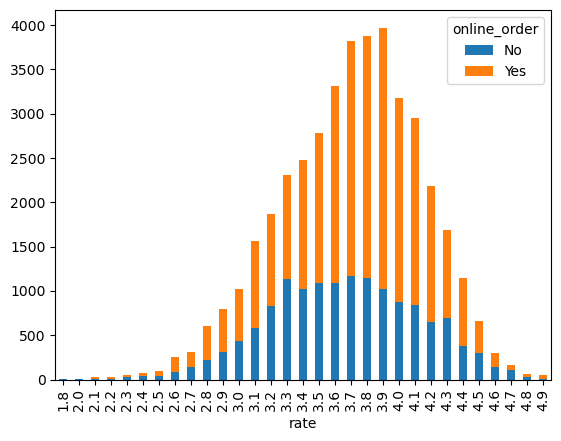

In [17]:
x.plot(kind = 'bar', stacked =  True)

In [18]:
# getting sum of each rows.
x.sum(axis = 1).astype(float)

rate
1.8       5.0
2.0      11.0
2.1      24.0
2.2      26.0
2.3      51.0
2.4      70.0
2.5     101.0
2.6     260.0
2.7     307.0
2.8     600.0
2.9     802.0
3.0    1023.0
3.1    1561.0
3.2    1873.0
3.3    2310.0
3.4    2476.0
3.5    2784.0
3.6    3316.0
3.7    3821.0
3.8    3873.0
3.9    3972.0
4.0    3183.0
4.1    2948.0
4.2    2184.0
4.3    1693.0
4.4    1147.0
4.5     656.0
4.6     300.0
4.7     167.0
4.8      66.0
4.9      55.0
dtype: float64

In [19]:
normalize_df = x.div(x.sum(axis = 1).astype(float), axis = 0)

In [20]:
normalize_df

online_order,No,Yes
rate,,
1.8,1.000000,0.000000
2.0,1.000000,0.000000
2.1,0.375000,0.625000
2.2,0.384615,0.615385
2.3,0.568627,0.431373
2.4,0.514286,0.485714
2.5,0.376238,0.623762
2.6,0.319231,0.680769
2.7,0.459283,0.540717


<AxesSubplot:xlabel='rate'>

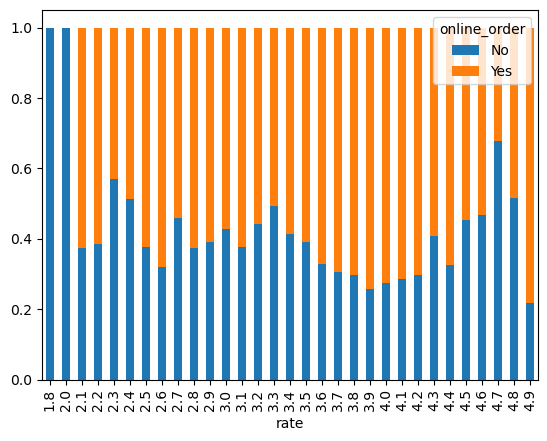

In [21]:
normalize_df.plot(kind = 'bar', stacked = True)

In [22]:
# from the above graph we can say that for good rating restaurants should have more online orders 


In [23]:
df.head(2)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [24]:
# checking missing values/ null values in rest_type column
df['rest_type'].isnull().sum()

227

In [25]:
# deleting null values from rest_type column 
data = df.dropna(subset = ['rest_type'])

In [26]:
data['rest_type'].isnull().sum()

0

In [27]:
# checking unique values in rest_type column (Restaurant type) 
data.rest_type.unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

In [28]:
# picking a restaurant quick_bites and generating variable containing data of rest_type "Quick Bites"
quick_bites_df = data[data['rest_type'].str.contains('Quick Bites')]

In [29]:
quick_bites_df.shape

(20639, 18)

In [30]:
quick_bites_df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [31]:
# Checking review_list column data
quick_bites_df['reviews_list']

3        [('Rated 4.0', "RATED\n  Great food and proper...
23       [('Rated 4.0', "RATED\n  So, went here with fr...
26       [('Rated 5.0', 'RATED\n  please provide some e...
31       [('Rated 1.0', "RATED\n  Worst restaurant ever...
34       [('Rated 3.0', 'RATED\n  Not worth for the mon...
                               ...                        
51641    [('Rated 2.0', "RATED\n  Food is not upto the ...
51642                                                   []
51643                                                   []
51644                                                   []
51645    [('Rated 5.0', "RATED\n  I was randomly lookin...
Name: reviews_list, Length: 20639, dtype: object

In [32]:
# we will check that what are some famous restuarant that users try to check through review keywords.
# we will try to get those topmost keywords that most users have given in review column to get what users want as a dish.

In [33]:
# lower case all values in review list to remove and ambiguity for identifying small and capital letters in same words.

quick_bites_df['reviews_list'] = quick_bites_df['reviews_list'].apply(lambda x :x.lower())

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_8352\2980711875.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quick_bites_df['reviews_list'] = quick_bites_df['reviews_list'].apply(lambda x :x.lower())


In [34]:
# removing special characters from review_list column data
# data cleaning to perform text analysis.
from nltk.corpus import RegexpTokenizer

In [35]:
# tokenizing the words in a sentence according to below pattern. (having only lower and uppercase words excluding and special character)
tokenizer = RegexpTokenizer('[a-zA-Z]+')

In [36]:
tokenizer

RegexpTokenizer(pattern='[a-zA-Z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)

In [37]:
print(tokenizer.tokenize(quick_bites_df['reviews_list'][3]))

['rated', 'rated', 'n', 'great', 'food', 'and', 'proper', 'karnataka', 'style', 'full', 'meals', 'been', 'there', 'twice', 'and', 'was', 'fully', 'satisfied', 'will', 'give', 'stars', 'if', 'it', 's', 'well', 'managed', 'rated', 'rated', 'n', 'reached', 'the', 'place', 'at', 'pm', 'on', 'saturday', 'half', 'of', 'the', 'items', 'on', 'the', 'menu', 'were', 'over', 'what', 'was', 'annoying', 'was', 'is', 'the', 'food', 'was', 'cold', 'the', 'taste', 'was', 'also', 'very', 'average', 'only', 'dosa', 'and', 'holige', 'were', 'good', 'there', 'were', 'very', 'few', 'people', 'in', 'the', 'restaurant', 'and', 'the', 'service', 'was', 'still', 'very', 'slow', 'the', 'waiters', 'were', 'all', 'standing', 'in', 'one', 'corner', 'and', 'talking', 'had', 'to', 'call', 'them', 'repeatedly', 'rated', 'rated', 'n', 'had', 'been', 'here', 'good', 'food', 'served', 'and', 'tasty', 'good', 'place', 'to', 'go', 'with', 'freinds', 'and', 'family', 'should', 'be', 'first', 'to', 'get', 'served', 'well', 

In [38]:
# reviews_tokens_df = reviews_tokens[0:10000]

In [39]:
# reviews_tokens = quick_bites_df['reviews_list'].apply(tokenizer.tokenize)
reviews_tokens = data['reviews_list'].apply(tokenizer.tokenize)

In [40]:
# perform unigram analysis and removal of stopwords.
reviews_tokens 

0        [Rated, RATED, n, A, beautiful, place, to, din...
1        [Rated, RATED, n, Had, been, here, for, dinner...
2        [Rated, RATED, n, Ambience, is, not, that, goo...
3        [Rated, RATED, n, Great, food, and, proper, Ka...
4        [Rated, RATED, n, Very, good, restaurant, in, ...
                               ...                        
51712    [Rated, RATED, n, Food, and, service, are, inc...
51713                                                   []
51714                                                   []
51715    [Rated, RATED, n, Nice, and, friendly, place, ...
51716    [Rated, RATED, n, Great, ambience, looking, ni...
Name: reviews_list, Length: 51490, dtype: object

In [41]:
# importing stopwords to remove it from our text data and text analysis on remaining data 
from nltk.corpus import stopwords

In [42]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abhishek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
# storing all english stopwords in nltk library. 
stop = stopwords.words('english')

In [44]:
# printing stopwords (stopwords are those words that does not provide any analytic value in a sentence for analysis.) 
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [45]:
# adding below words in stopwords as these words are frequently used and does not have any sense for our analysis.
stop.extend(['rated', 'RATED', 'Rated', 'x', 'nan', 'n'])

In [46]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [47]:
rev3 = reviews_tokens[3]
print(rev3)

['Rated', 'RATED', 'n', 'Great', 'food', 'and', 'proper', 'Karnataka', 'style', 'full', 'meals', 'Been', 'there', 'twice', 'and', 'was', 'fully', 'satisfied', 'Will', 'give', 'stars', 'if', 'it', 's', 'well', 'managed', 'Rated', 'RATED', 'n', 'Reached', 'the', 'place', 'at', 'pm', 'on', 'Saturday', 'Half', 'of', 'the', 'items', 'on', 'the', 'menu', 'were', 'over', 'What', 'was', 'annoying', 'was', 'is', 'the', 'food', 'was', 'cold', 'The', 'taste', 'was', 'also', 'very', 'average', 'Only', 'dosa', 'and', 'holige', 'were', 'good', 'There', 'were', 'very', 'few', 'people', 'in', 'the', 'restaurant', 'and', 'the', 'service', 'was', 'still', 'very', 'slow', 'The', 'waiters', 'were', 'all', 'standing', 'in', 'one', 'corner', 'and', 'talking', 'Had', 'to', 'call', 'them', 'repeatedly', 'Rated', 'RATED', 'n', 'Had', 'been', 'here', 'good', 'food', 'served', 'and', 'tasty', 'good', 'place', 'to', 'go', 'with', 'freinds', 'and', 'family', 'should', 'be', 'first', 'to', 'get', 'served', 'well', 

In [49]:
# creating a column which will contain only those words from review column which are not in stop (stopwords) list. It means
# if any word from review column which is not in stopwrds list than we will consider thta word otherwise neglect.
reviews_tokens_clean = reviews_tokens.apply(lambda each_review : [token for token in each_review if token not in stop])

In [50]:
# created updated column not containg any stopwords
reviews_tokens_clean

0        [A, beautiful, place, dine, The, interiors, ta...
1        [Had, dinner, family, Turned, good, choose, su...
2        [Ambience, good, enough, pocket, friendly, caf...
3        [Great, food, proper, Karnataka, style, full, ...
4        [Very, good, restaurant, neighbourhood, Buffet...
                               ...                        
51712    [Food, service, incomparably, excellent, The, ...
51713                                                   []
51714                                                   []
51715    [Nice, friendly, place, staff, awesome, Ansur,...
51716    [Great, ambience, looking, nice, good, selecti...
Name: reviews_list, Length: 51490, dtype: object

In [51]:
# checking type of above created column 
type(reviews_tokens_clean)

pandas.core.series.Series

In [52]:
# storing the series type in a 2d matrix table 
total_reviews_2d = list(reviews_tokens_clean)

In [53]:
# converting review_tokens_clean column to 1d list. 
total_reviews_1d = []

for review in total_reviews_2d:
    for word in review:
        total_reviews_1d.append(word)

In [143]:
total_reviews_1d

['A',
 'beautiful',
 'place',
 'dine',
 'The',
 'interiors',
 'take',
 'back',
 'Mughal',
 'era',
 'The',
 'lightings',
 'perfect',
 'We',
 'went',
 'occasion',
 'Christmas',
 'limited',
 'items',
 'available',
 'But',
 'taste',
 'service',
 'compromised',
 'The',
 'complaint',
 'breads',
 'could',
 'better',
 'Would',
 'surely',
 'like',
 'come',
 'I',
 'dinner',
 'family',
 'weekday',
 'The',
 'restaurant',
 'completely',
 'empty',
 'Ambience',
 'good',
 'good',
 'old',
 'hindi',
 'music',
 'Seating',
 'arrangement',
 'good',
 'We',
 'ordered',
 'masala',
 'papad',
 'panner',
 'baby',
 'corn',
 'starters',
 'lemon',
 'corrionder',
 'soup',
 'butter',
 'roti',
 'olive',
 'chilli',
 'paratha',
 'Food',
 'fresh',
 'good',
 'service',
 'good',
 'Good',
 'family',
 'hangout',
 'nCheers',
 'Its',
 'restaurant',
 'near',
 'Banashankari',
 'BDA',
 'Me',
 'along',
 'office',
 'friends',
 'visited',
 'buffet',
 'unfortunately',
 'provide',
 'veg',
 'buffet',
 'On',
 'inquiring',
 'said',
 'pla

In [55]:
# Performing Unigram Analysis (getting single word and their frequency or count) 
from nltk import FreqDist

In [56]:
fd = FreqDist()

In [57]:
# counting no of counts for eachg word in total_reviews_1d
for word in total_reviews_1d:
    fd[word] = fd[word] + 1

In [58]:
# top 20 most common words in our review 
fd.most_common(20)

[('place', 958892),
 ('I', 906624),
 ('good', 870711),
 ('food', 800115),
 ('The', 667679),
 ('chicken', 313719),
 ('service', 273865),
 ('ordered', 261388),
 ('taste', 245081),
 ('great', 235933),
 ('really', 234390),
 ('try', 218724),
 ('ambience', 217874),
 ('time', 217257),
 ('one', 213594),
 ('It', 206382),
 ('also', 202443),
 ('like', 197463),
 ('We', 184449),
 ('visit', 183865)]

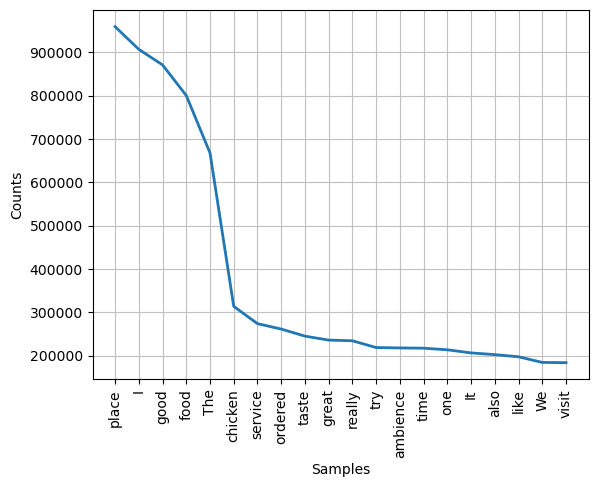

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [59]:
# plotting those top 20 words and their count in review column by the user.
fd.plot(20)

In [60]:
# in dishes chicken word is mostly used which shows that user has a preference of chicken dishes.

In [61]:
# bigram and trigram analysis.
# bigram --> collection of two words
# trigram --> collection of three words

In [62]:
# Performing Bigram and trigram Analysis
from nltk import FreqDist, bigrams, trigrams

In [63]:
# generating combinations of two words 
bi_gram = bigrams(total_reviews_1d)

In [64]:
# counting frequency of combination of two words from review column 
fd_bigram = FreqDist()

for bigram in bi_gram:
    fd_bigram[bigram] = fd_bigram[bigram] + 1

In [65]:
#  Most common words in Bigram analysis
fd_bigram.most_common(20)

[(('The', 'food'), 70551),
 (('really', 'good'), 64671),
 (('I', 'ordered'), 60088),
 (('This', 'place'), 54963),
 (('must', 'try'), 53865),
 (('We', 'ordered'), 52692),
 (('I', 'would'), 47294),
 (('visit', 'place'), 45409),
 (('The', 'place'), 43758),
 (('food', 'good'), 42791),
 (('good', 'food'), 42433),
 (('f', 'f'), 37330),
 (('good', 'place'), 36570),
 (('main', 'course'), 34713),
 (('The', 'ambience'), 33846),
 (('ice', 'cream'), 33429),
 (('also', 'good'), 32487),
 (('non', 'veg'), 32321),
 (('The', 'service'), 28278),
 (('I', 'tried'), 27983)]

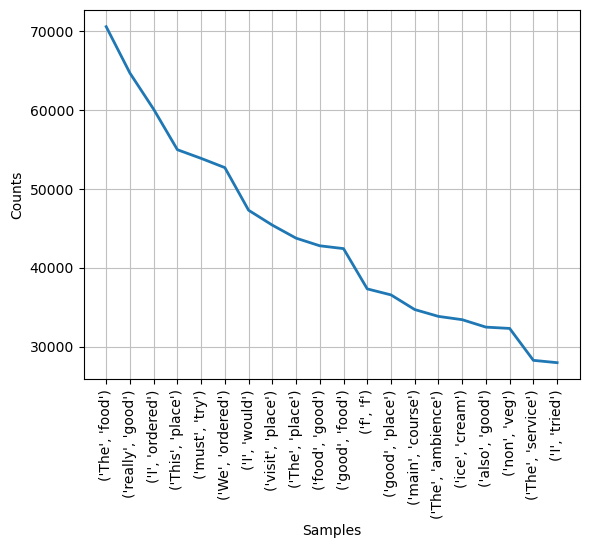

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [66]:
# plotting bigram analysis words and their counts. 
fd_bigram.plot(20)

In [67]:
tri_gram = trigrams(total_reviews_1d)

In [68]:
fd_trigram = FreqDist()

for trigram in tri_gram:
    fd_trigram[trigram] = fd_trigram[trigram] + 1

In [69]:
# top 20 combinations of 3 words most common by trigram analysis
fd_trigram.most_common(20)

[(('f', 'f', 'f'), 19127),
 (('veg', 'non', 'veg'), 9254),
 (('The', 'food', 'good'), 9236),
 (('must', 'visit', 'place'), 9137),
 (('place', 'hangout', 'friends'), 8869),
 (('f', 'c', 'f'), 8001),
 (('xa', 'xa', 'xa'), 7959),
 (('I', 'must', 'say'), 7657),
 (('I', 'visited', 'place'), 7594),
 (('I', 'would', 'recommend'), 6478),
 (('nFood', 'nAmbience', 'nService'), 6236),
 (('I', 'would', 'say'), 5719),
 (('food', 'really', 'good'), 5624),
 (('A', 'good', 'place'), 5454),
 (('A', 'must', 'visit'), 5385),
 (('place', 'hang', 'friends'), 5366),
 (('c', 'f', 'f'), 4784),
 (('The', 'ambience', 'good'), 4665),
 (('North', 'Indian', 'food'), 4597),
 (('nFood', 'nService', 'nAmbience'), 4521)]

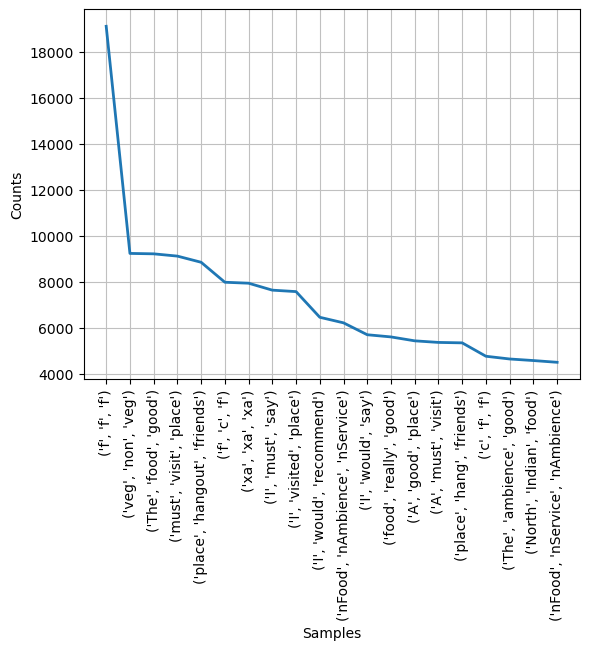

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [70]:
fd_trigram.plot(20)

In [71]:
# north india food and paneer butter masala and chicken fried rice are some common words which are most frequent 
#in review which shows that bengaluru 
# people are mostly trying north indian food and paneer masala and chicken fried rice as compare to other in bangalore

In [72]:
# now we want to know that which places restaurants are selling north indian cuisines.

In [73]:
# extract geographical coordinates from data

In [74]:
df.head(3)


,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [75]:
!pip install geocoder
! pip install geopy

In [76]:
# getting unique values from location column
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', None, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan

In [77]:
len(df['location'].unique())

94

In [78]:
# adding bangalore karnataka india to get exact location on map. (latitiude and longitude)
df['location'] = df['location'] + ', Bangalore, Karnataka, India'

In [79]:
df['location'][0]

'Banashankari, Bangalore, Karnataka, India'

In [80]:
# making a copy of df file so that changes will not effect original dataset.
df_copy = df.copy()

In [81]:
# getting null values 
df_copy['location'].isnull().sum()

21

In [82]:
# dropping all those null values 
df_copy = df_copy.dropna(subset = ['location'])

In [83]:
# checking again the null values 
df_copy['location'].isnull().sum()

0

In [84]:
# storing all the locations in location datframe
locations = pd.DataFrame(df_copy['location'].unique())

In [85]:
locations

,0
0,"Banashankari, Bangalore, Karnataka, India"
1,"Basavanagudi, Bangalore, Karnataka, India"
2,"Mysore Road, Bangalore, Karnataka, India"
3,"Jayanagar, Bangalore, Karnataka, India"
4,"Kumaraswamy Layout, Bangalore, Karnataka, India"
...,...
88,"West Bangalore, Bangalore, Karnataka, India"
89,"Magadi Road, Bangalore, Karnataka, India"
90,"Yelahanka, Bangalore, Karnataka, India"
91,"Sahakara Nagar, Bangalore, Karnataka, India"


In [86]:
# naming location column name as name 
locations.columns = ['name']

In [87]:
locations

,name
0,"Banashankari, Bangalore, Karnataka, India"
1,"Basavanagudi, Bangalore, Karnataka, India"
2,"Mysore Road, Bangalore, Karnataka, India"
3,"Jayanagar, Bangalore, Karnataka, India"
4,"Kumaraswamy Layout, Bangalore, Karnataka, India"
...,...
88,"West Bangalore, Bangalore, Karnataka, India"
89,"Magadi Road, Bangalore, Karnataka, India"
90,"Yelahanka, Bangalore, Karnataka, India"
91,"Sahakara Nagar, Bangalore, Karnataka, India"


In [88]:
# extracting geographical coordinates from location 
# Nominatim is a open stream map api that will return latitude and longitude
from geopy.geocoders import Nominatim

In [89]:
# initialising and making connection 
geolocator = Nominatim(user_agent = 'app', timeout = None)

In [90]:
# storing latitude and longitude values of locations in two list
long = []
lat = []


for location in locations['name']:
    location = geolocator.geocode(location)
    
    if location is None:
        lat.append(np.nan)
        long.append(np.nan)
    else:
        lat.append(location.latitude)
        long.append(location.longitude)
        

In [91]:
# creating columns for latitude and longitude in locations datframe
locations['latitude'] = lat
locations['longitude'] = long

In [92]:
locations

,name,latitude,longitude
0,"Banashankari, Bangalore, Karnataka, India",12.915221,77.573598
1,"Basavanagudi, Bangalore, Karnataka, India",12.941726,77.575502
2,"Mysore Road, Bangalore, Karnataka, India",12.946662,77.530090
3,"Jayanagar, Bangalore, Karnataka, India",12.929273,77.582423
4,"Kumaraswamy Layout, Bangalore, Karnataka, India",12.908149,77.555318
...,...,...,...
88,"West Bangalore, Bangalore, Karnataka, India",13.022235,77.567183
89,"Magadi Road, Bangalore, Karnataka, India",12.975608,77.555356
90,"Yelahanka, Bangalore, Karnataka, India",13.100698,77.596345
91,"Sahakara Nagar, Bangalore, Karnataka, India",13.062147,77.580061


In [94]:
# checking null values in locations dataset 
locations.isnull().sum()

name         0
latitude     3
longitude    3
dtype: int64

In [95]:
# getting locations where latitude is null 

locations[locations['latitude'].isna()]

,name,latitude,longitude
45,"St. Marks Road, Bangalore, Karnataka, India",NaN,NaN
79,"Rammurthy Nagar, Bangalore, Karnataka, India",NaN,NaN
85,"Sadashiv Nagar, Bangalore, Karnataka, India",NaN,NaN


In [ ]:
# for these three location nominatim cant find the geographical coordinates so we will fill these location coordinates 
# manully by using google.

In [96]:
# Ignoring all warnings
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [97]:
# providing latitude and longitude values for 3 locations
locations['latitude'][45] = 12.9764122
locations['longitude'][45] = 77.6017437

In [98]:
locations['latitude'][79] = 13.0120218
locations['longitude'][79] = 77.6777817

In [99]:
locations['latitude'][85] = 13.010316
locations['longitude'][85] = 77.580569

In [100]:
# checking null values now.
locations.isnull().sum()

name         0
latitude     0
longitude    0
dtype: int64

In [103]:
# creating heatmap for north indian cuisines.
# error occurs because cuisines contain null values. Don't worry execute the next lines to remove this error
df[df['cuisines'].str.contains('North Indian')]


ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [104]:
# checking null values in cuisines 
df['cuisines'].isnull().sum()

45

In [105]:
# dropping those rows which contain null values in cuisines
df = df.dropna(subset = ['cuisines'])

In [108]:
# Creating hotspots for north indian cuisines
# storing north indian cuisines data in north_india variable
north_india = df[df['cuisines'].str.contains('North Indian')]

In [109]:
north_india.shape

(21085, 18)

In [117]:
north_india["location"].value_counts().reset_index()

,index,location
0,"BTM, Bangalore, Karnataka, India",2469
1,"HSR, Bangalore, Karnataka, India",1123
2,"Whitefield, Bangalore, Karnataka, India",1059
3,"Marathahalli, Bangalore, Karnataka, India",1038
4,"JP Nagar, Bangalore, Karnataka, India",958
...,...,...
85,"Hebbal, Bangalore, Karnataka, India",4
86,"Jakkur, Bangalore, Karnataka, India",3
87,"Central Bangalore, Bangalore, Karnataka, India",2
88,"West Bangalore, Bangalore, Karnataka, India",1


In [118]:
# changing column name index to name and location to counts
north_india_rest_count = north_india['location'].value_counts().reset_index().rename(columns = {'index': 'name', 'location' : 'count'})

In [119]:
north_india_rest_count

,name,count
0,"BTM, Bangalore, Karnataka, India",2469
1,"HSR, Bangalore, Karnataka, India",1123
2,"Whitefield, Bangalore, Karnataka, India",1059
3,"Marathahalli, Bangalore, Karnataka, India",1038
4,"JP Nagar, Bangalore, Karnataka, India",958
...,...,...
85,"Hebbal, Bangalore, Karnataka, India",4
86,"Jakkur, Bangalore, Karnataka, India",3
87,"Central Bangalore, Bangalore, Karnataka, India",2
88,"West Bangalore, Bangalore, Karnataka, India",1


In [121]:
# merging location column with north_india_rest_count on name (common column locations name) 
heatmap_df = north_india_rest_count.merge(locations , on = 'name', how = 'left')

In [122]:
heatmap_df

,name,count,latitude,longitude
0,"BTM, Bangalore, Karnataka, India",2469,12.911276,77.604565
1,"HSR, Bangalore, Karnataka, India",1123,12.911623,77.638862
2,"Whitefield, Bangalore, Karnataka, India",1059,12.969637,77.749745
3,"Marathahalli, Bangalore, Karnataka, India",1038,12.955257,77.698416
4,"JP Nagar, Bangalore, Karnataka, India",958,12.912264,77.590457
...,...,...,...,...
85,"Hebbal, Bangalore, Karnataka, India",4,13.038218,77.591900
86,"Jakkur, Bangalore, Karnataka, India",3,13.078474,77.606894
87,"Central Bangalore, Bangalore, Karnataka, India",2,13.010129,77.554801
88,"West Bangalore, Bangalore, Karnataka, India",1,13.022235,77.567183


In [123]:
# creating a basemap (of bangalore city)

In [124]:
!pip install folium

In [125]:
import folium

In [126]:
# storing basemap in basemap variable 
basemap = folium.Map()

In [127]:
# map of entire world
basemap

In [129]:
# heatmap_df column names
heatmap_df.columns

Index(['name', 'count', 'latitude', 'longitude'], dtype='object')

In [130]:
from folium.plugins import HeatMap

In [132]:
# maintain this heirarchy (latitude then longitude and then count) (initilaising heatmap and adding it to basemap)
HeatMap(heatmap_df[['latitude', 'longitude', 'count']]).add_to(basemap)

In [133]:
# generating heatmaps for north indian cuisines restaurants in bangalore. 
basemap

In [134]:
# automate task : perform automation

def get_heatmap(cuisine):
    cuisine_df = df[df['cuisines'].str.contains(cuisine)]
    
    cuisine_rest_count = cuisine_df['location'].value_counts().reset_index().rename(columns = {'index': 'name', 'location' : 'count'})
    heatmap_df = cuisine_rest_count.merge(locations , on = 'name', how = 'left')
    print(heatmap_df.head(4))
    
    basemap = folium.Map()
    HeatMap(heatmap_df[['latitude', 'longitude', 'count']]).add_to(basemap)
    return basemap

In [135]:
# for south indian cuisines in bangalore
get_heatmap('South Indian')

                                     name  count   latitude  longitude
0        BTM, Bangalore, Karnataka, India    815  12.911276  77.604565
1   JP Nagar, Bangalore, Karnataka, India    437  12.912264  77.590457
2        HSR, Bangalore, Karnataka, India    436  12.911623  77.638862
3  Jayanagar, Bangalore, Karnataka, India    416  12.929273  77.582423


In [136]:
# for chinese cuisines in bangalore  
get_heatmap("Chinese")

                                                name  count   latitude  \
0                   BTM, Bangalore, Karnataka, India   1824  12.911276   
1                   HSR, Bangalore, Karnataka, India    760  12.911623   
2  Koramangala 5th Block, Bangalore, Karnataka, I...    730  12.934843   
3          Marathahalli, Bangalore, Karnataka, India    668  12.955257   

   longitude  
0  77.604565  
1  77.638862  
2  77.618977  
3  77.698416  
